## Workflow Lessons -- MODIS Data

In [1]:
# Import libraries
import warnings
from glob import glob
import os

import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import re  # regular expressions

import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

# Get Landsat data
et.data.get_data(url="https://ndownloader.figshare.com/files/21941085")

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))
warnings.simplefilter('ignore')

# Start With Pseudocoding

Coding can seem daunting when you are starting from scratch. Start with what 
you know - English or whatever your native language is! Write out the steps 
as comments FIRST. 

In this case, you know that you have two directories of landsat scenes to 
process. You could process each directory individually, howerever the code
to do this will get complex and difficult to manage quickly. 

Using loops and well-named functions you can simplify your workflow. But, 
to create useful workflows you need to first create a workflow design using 
pseudo code. 

## Save Intermediate Objects

The approach in this course so far to save objects has been to name objects
individually and use them as needed. However Python has the `dictionary` 
type that allows you to create unique keys. These keys can be used to store
data with associated metadata. For example:

`modis["date-here"]["ndvi"]`

could be used to store the NDVI output for modis at a particular date.

Below you will build out a workflow from scratch. You will start with 
the core loop as an individual item that loops through directories and 
parses important metadata (such as the date associated with a remote sensing
file).


## The steps

1. to begin you have two scenes to process. This could warrant a LOOP to 
process both scenes

```
# 1. Loop through both landsat scenes
    * create a list with paths to both scenes
```

Now, you know from your previous assignment that the DATE at which the landsat.
So, let's expand this pseudocode a bit

```
# 1. Loop through both landsat scenes
    * create a list with paths to both scenes
    * in each iteraction, grab the date from the directory name
    * create an empty dictionary with a key for that date
```

Below this pseudocode is implemented in a cell using comments. Add the code 
required to build out the pseudo-code into functioning code.

Build your loop iteratively and run it as you add a line or two of code to 
ensure things work as you expect them to. Notice below there are print 
statements added to ensure the output is as expected! 

This is a great way to ensure that your paths are correct.


## Build out the Full Workflow in Pseudocode

**fill in steps as you go**

Continue with this pseudocode approach and build out the entire workflow. 
In your first pass you won't get all of the individual steps down. This is ok
just get things started and build it out as you go. 

NOTE: this notebook as a demo has many cells, you'd most likely build out your 
workflow in a single cell or two. i generally like to add a loop AFTER the cell
that contains the functions that the loop calls.
```
# To begin create your pseudo code

# High level

# 1. Loop through each landsat directory of tif files (each scene)
#    * create a list with paths to dirs from both scenes
#    * in each iteration, grab the date from the directory name
#    * create an empty dictionary with a key for that date
# 2. Create a list of all tif files in the scene's directory
# 3. Open / crop the files
# 4. Stack the cropped files - in this case you will want to use many different bands for the 2 veg indices
# 5. Mask / Clean  the data
# 6. Calculate veg indices
#    - NDVI
#    - NBR / dNBR

```

# Build Out Your Loop

You can start with the processing code OR with the loop. There is no 
right or wrong approach. The important part of this is to think about
the ENTIRE workflow first and then implement code associated with the 
workflow requirements. 


In [2]:
# 1. Loop through both landsat scenes
#    * create a list with paths to both scenes
#    * in each iteration, grab the date from the directory name
#    * create an empty dictionary with a key for that date

In [3]:
# 1. Loop through both landsat scenes

#    * create a list with paths to both scenes
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")
# view subdirectories of data
all_dirs = glob(os.path.join(data_path, "*"))

for landsat_dir in all_dirs:
    all_files = []
    print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    
#    * in each iteraction, grab the date from the directory name
#    * create an empty dictionary with a key for that date
    
all_files

earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017
earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205


['earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4.tif',
 'earthpy-downloads/land

You now have the start of a loop. Add the second element of the loop which 
involves creating a dictionary and creating keys for each date

In [4]:
# 1. Loop through both landsat scenes

#    * create a list with paths to both scenes
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")
# view subdirectories of data
all_dirs = glob(os.path.join(data_path, "*"))


for landsat_dir in all_dirs:
    all_files = []
    print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    
    print("path: ", landsat_dir)
    # Get the landsat scene name / directory
    
    #    * in each iteraction, grab the date from the directory name
    landsat_scene = os.path.basename(os.path.normpath(landsat_dir))
    print("scene name: ", landsat_scene)
    
    # Get the date from the scene name
    print("date: ", landsat_scene[10:18])

#    * create an empty dictionary with a key for that date
    
all_files

earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017
path:  earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017
scene name:  LC080340322016062101T1-SC20200306230017
date:  20160621
earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205
path:  earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205
scene name:  LC080340322016072301T1-SC20200306230205
date:  20160723


['earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4.tif',
 'earthpy-downloads/land

Finally, add the dictionary to store your output data in.

In [5]:
# Create empty dictionary
landsat_veg_indices = {}

# 1. Loop through both landsat scenes

#    * create a list with paths to both scenes
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")
# view subdirectories of data
all_dirs = glob(os.path.join(data_path, "*/"))


for landsat_dir in all_dirs:
    all_files = []
    print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    
    print("path: ", landsat_dir)
    # Get the landsat scene name / directory
    
    #    * in each iteraction, grab the date from the directory name
    landsat_scene = os.path.basename(os.path.normpath(landsat_dir))
    print("scene name: ", landsat_scene)
    
    # Get the date from the scene name
    date = landsat_scene[10:18]
    print("date: ", date)
    landsat_veg_indices[date] = []
    
    print("\n")

#    * create an empty dictionary with a key for that date
    
landsat_veg_indices

earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/
path:  earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/
scene name:  LC080340322016062101T1-SC20200306230017
date:  20160621


earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/
path:  earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/
scene name:  LC080340322016072301T1-SC20200306230205
date:  20160723




{'20160621': [], '20160723': []}

Everything is printing nicely above so you can clean up your code and remove 
print statements now. 

This will be the core workflow! You are now ready to add the remote sensing 
processing steps to the loop. 

**Note** - if you have a big loop, you may want to 
only process two directories at a time rather than parsing through the entire
loop each time you run the cell. 


In [6]:

# Open fire boundary 
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = gpd.read_file(fire_boundary_path)


# Create empty dictionary
landsat_veg_indices = {}

# 1. Loop through both landsat scenes

#    * create a list with paths to both scenes
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")
# view subdirectories of data
all_dirs = glob(os.path.join(data_path, "/*/"))

# IMPORTANT all_dirs[1] would ensure that the loop only processes 2 scenes! 

for landsat_dir in all_dirs[1]:
    # Get the landsat scene name / directory & extract date    
    landsat_scene = os.path.basename(os.path.normpath(landsat_dir))
    
    # Get the date from the scene name
    date = landsat_scene[10:18]
    landsat_veg_indices[date] = []
    
    # 2. Create a list of all tif files in the scene's directory
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    # 3. Open / crop the files 
        # requirements: crop extent - you need a boundary - add it to the code)
    # 4. Stack the cropped files - in this case you will want to use many different bands for the 2 veg indices
    # 5. Mask / Clean  the data
    # 6. Calculate veg indices
    #    - NDVI
    #    - NBR / dNBR
    
landsat_veg_indices

{'': []}

### Add Code to Your PseudoCode
Now you can start to work through adding code to your pseudocode. Take it 
step by step and think about potential issues that you may encounter in each step.

Below you can see the code filled in - in between each comment which comes from the pseudo code.

Developing the example below was a process:

1. Create your pseudo code for the steps that you want to perform 
2. Create your EMPTY outer loop as a test to implement this across multiple directories (above)
3. Begin to add code below each line of pseudo code. as you add your code:
    1. Consider the inputs and ouputs of each function (use help(function_name) to help with this. 
    2. Consider where things could fail and add tests using try: statements or conditionals (`if` statements)
    
Now you have a few options. You can create the loop first and add code incrementally.
You could also create the loop AFTEr writing out your code. 

A nice middle ground is to create your loop but only loop through one directory to begin with. 
Create your workflow. Then combine the two

In [7]:
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")

# First create the high level loop to loop through each landsat directory of tif files (each scene)

# Get all directories  - remember that getting a list makes things more scalabe
all_dirs = glob(os.path.join(data_path, "*"))

# Create a loop variable that you can use to run your code for a single directory
landsat_dir = all_dirs[0]
# Loop through this list - commenting out the loop for now and just focusing on the workflow! 
#for landsat_dir in all_dirs:
all_files = []

# Get all tif files in the directory
all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))

# open / crop the files - this actually requires several steps including
# 1. creating an output crop path,
crop_dir_path = os.path.join(landsat_dir, "cropped")

# 2. opening up the fire boundary to crop (this only need to be opened once)
# Open fire boundary 
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = gpd.read_file(fire_boundary_path)

# 3. Crop the data (several sub steps here)

# Test that output dir where you'll save cropped files exists
# make the dir if it doesn't exist
if not os.path.exists(crop_dir_path):
    os.mkdir(crop_dir_path)

with rio.open(all_files[0]) as src:
    fire_bound_reproject = fire_boundary.to_crs(src.crs)

es.crop_all(raster_paths=all_files,
            output_dir=crop_dir_path,
            geoms=fire_bound_reproject,
            overwrite=True)
# Get a list of bands to stack
sorted(glob(crop_dir_path + "/*band*.tif"))

# Stack the bands for NDVI and NBR calculation


# Mask clouds from the stacked bands

# 1. open the qa layer


# Generate list of values to mask using the pixel qa layer


# 2. mask the numpy array
# Create test to ensure the values are in the mask qa layer

# Perform the steps below for each landsat scene
# Because we are going to need several bands to calculate NDVI and NBR let's crop them all with es.crop_all


# Clean data (clouds and no data values)

# Calculate nbr

# Calculate dNBR from pre-post fire nbr

# Reclassify dnbr to create final plot

# Plot data

['earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropped/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif',
 'earthpy-downloads/landsat-coldsprings-hw/LC080340322016062101T1-SC20200306230017/cropp

In [8]:
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")

# First create the high level loop to loop through each landsat directory of tif files (each scene)

# Get all directories  - remember that getting a list makes things more scalabe
all_dirs = glob(os.path.join(data_path, "*"))

# Loop through this list

all_files = []
# print(landsat_dir)
# Get all tif files in the directory
all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
crop_path = os.path.join(landsat_dir, "cropped")

# open / crop the files - this actually requires several steps including
# 1. creating an output crop path,
# 2. opening up the fire boundary to crop
# 3. Cropping the data
if not os.path.exists(crop_path):
    os.mkdir(crop_path)

with rio.open(all_files[0]) as src:
    fire_bound_reproject = fire_boundary.to_crs(src.crs)

es.crop_all(raster_paths=all_files,
            output_dir=crop_path,
            geoms=fire_bound_reproject,
            overwrite=True)
# Get a list of bands to stack
all_bands = sorted(glob(crop_path + "/*band*.tif"))

# Stack the bands for NDVI and NBR calculation
landsat_bands, landsat_meta = es.stack(all_bands)

# Mask clouds from the stacked bands

# 1. open the qa layer
pixel_qa_path = glob(crop_path + "/*pixel_qa*.tif")
with rio.open(pixel_qa_path[0]) as src:
    mask_arr = src.read(1)

# Generate list of values to mask using the pixel qa layer
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]
all_masked_values = cloud_shadow + cloud + high_cloud_confidence

# 2. mask the numpy array
# Create test to ensure the values are in the mask qa layer
if any(i in np.unique(mask_arr) for i in all_masked_values):
    landsat_masked_bands = em.mask_pixels(landsat_bands,
                                          mask_arr,
                                          vals=all_masked_values)
else:
    print("There are no pixels to mask")

# Perform the steps below for each landsat scene
# Because we are going to need several bands to calculate NDVI and NBR let's crop them all with es.crop_all


# Clean data (clouds and no data values)

# Calculate nbr

# Calculate dNBR from pre-post fire nbr

# Reclassify dnbr to create final plot

# Plot data

There are no pixels to mask


Once you have setup your code and it works on a scene, or within your loop you 
can think about making it modular. I often look at my code and find steps that 
are related that might pair nicely together in a function. Well-named Functions will 
make your code easier to read and trouble shoot.

In [9]:
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")

# First create the high level loop to loop through each landsat directory of tif files (each scene)

# Get all directories  - remember that getting a list makes things more scalabe
all_dirs = glob(os.path.join(data_path, "*"))

# Loop through this list


all_files = []
# print(landsat_dir)
# Get all tif files in the directory
all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
crop_path = os.path.join(landsat_dir, "cropped")

# BEGIN FUNCTION that crops and returns a cropped stacked array of bands
# open / crop the files - this actually requires several steps including
# 1. creating an output crop path,
# 2. opening up the fire boundary to crop
# 3. Cropping the data
if not os.path.exists(crop_path):
    os.mkdir(crop_path)

with rio.open(all_files[0]) as src:
    fire_bound_reproject = fire_boundary.to_crs(src.crs)

es.crop_all(raster_paths=all_files,
            output_dir=crop_path,
            geoms=fire_bound_reproject,
            overwrite=True)
# Get a list of bands to stack
all_bands = sorted(glob(crop_path + "/*band*.tif"))

# Stack the bands for NDVI and NBR calculation
landsat_bands, landsat_meta = es.stack(all_bands)
# END FUNCTION that crops and returns a stack...

# BEGIN MASK FUNCTION
# Mask clouds from the stacked bands

# 1. open the qa layer
pixel_qa_path = glob(crop_path + "/*pixel_qa*.tif")
with rio.open(pixel_qa_path[0]) as src:
    mask_arr = src.read(1)

# Cloud mask values
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence
# 2. mask the numpy array
# Create test to ensure the values are in the mask qa layer
if any(i in np.unique(mask_arr) for i in all_masked_values):
    landsat_masked_bands = em.mask_pixels(landsat_bands,
                                          mask_arr,
                                          vals=all_masked_values)
else:
    print("There are no pixels to mask")
# END MASK FUNCTION


# Perform the steps below for each landsat scene
# Because we are going to need several bands to calculate NDVI and NBR let's crop them all with es.crop_all


# Clean data (clouds and no data values)

# Calculate nbr

# Calculate dNBR from pre-post fire nbr

# Reclassify dnbr to create final plot

# Plot data

There are no pixels to mask


In [10]:
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")

# First create the high level loop to loop through each landsat directory of tif files (each scene)

# Get all directories  - remember that getting a list makes things more scalabe
all_dirs = glob(os.path.join(data_path, "*"))

# Loop through this list

for landsat_dir in all_dirs:
    all_files = []
    # print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    crop_path = os.path.join(landsat_dir, "cropped")

    # BEGIN FUNCTION that crops and returns a cropped stacked array of bands
    # open / crop the files - this actually requires several steps including
    # 1. creating an output crop path,
    # 2. opening up the fire boundary to crop
    # 3. Cropping the data
    if not os.path.exists(crop_path):
        os.mkdir(crop_path)

    with rio.open(all_files[0]) as src:
        fire_bound_reproject = fire_boundary.to_crs(src.crs)

    es.crop_all(raster_paths=all_files,
                output_dir=crop_path,
                geoms=fire_bound_reproject,
                overwrite=True)
    # Get a list of bands to stack
    all_bands = sorted(glob(crop_path + "/*band*.tif"))

    # Stack the bands for NDVI and NBR calculation
    landsat_bands, landsat_meta = es.stack(all_bands)
    # END FUNCTION that crops and returns a stack...

    # BEGIN MASK FUNCTION
    # Mask clouds from the stacked bands

    # 1. open the qa layer
    pixel_qa_path = glob(crop_path + "/*pixel_qa*.tif")
    with rio.open(pixel_qa_path[0]) as src:
        mask_arr = src.read(1)

    # Cloud mask values
    high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
    cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
    cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

    all_masked_values = cloud_shadow + cloud + high_cloud_confidence
    # 2. mask the numpy array
    # Create test to ensure the values are in the mask qa layer
    if any(i in np.unique(mask_arr) for i in all_masked_values):
        landsat_masked_bands = em.mask_pixels(landsat_bands,
                                              mask_arr,
                                              vals=all_masked_values)
    else:
        print("There are no pixels to mask")
    # END MASK FUNCTION


# Perform the steps below for each landsat scene
# Because we are going to need several bands to calculate NDVI and NBR let's crop them all with es.crop_all


# Clean data (clouds and no data values)

# Calculate nbr

# Calculate dNBR from pre-post fire nbr

# Reclassify dnbr to create final plot

# Plot data

There are no pixels to mask
There are no pixels to mask


In [11]:



def crop_stack_data(files_to_crop, crop_path, crop_bound):
    """Crops a set of tif files and saves them in a crop directory.
    Returns a stacked numpy array of bands"""
    if not os.path.exists(crop_path):
        os.mkdir(crop_path)

    with rio.open(all_files[0]) as src:
        fire_bound_reproject = fire_boundary.to_crs(src.crs)

    es.crop_all(raster_paths=all_files,
                output_dir=crop_path,
                geoms=fire_bound_reproject,
                overwrite=True)
    # Get a list of bands to stack
    all_bands = sorted(glob(os.path.join(crop_path, "*band*.tif")))

    # Stack the bands for NDVI and NBR calculation
    return es.stack(all_bands)


def mask_data(arr, path_to_qa):
    """Function that masks a numpy array using a cloud qa layer"""

    # 1. open the qa layer
    with rio.open(pixel_qa_path[0]) as src:
        mask_arr = src.read(1)

    # Cloud mask values
    high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
    cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
    cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

    all_masked_values = cloud_shadow + cloud + high_cloud_confidence
    # 2. mask the numpy array
    # Create test to ensure the values are in the mask qa layer
    if any(i in np.unique(mask_arr) for i in all_masked_values):
        landsat_masked_bands = em.mask_pixels(landsat_bands,
                                              mask_arr,
                                              vals=all_masked_values)
        return landsat_masked_bands
    else:
        print("There are no pixels to mask")
        return arr

After creating the functions notice how much easier the code is to read!
At this point you have a working loop and you can continue to add pieces of 
your workflow.

Functions are a nice way to organize your work because they allow you to 
modularize your workflow, extracting steps into individual components that you 
can test. 

In [12]:
data_path = os.path.join("earthpy-downloads", "landsat-coldsprings-hw")
# view subdirectories of data
all_dirs = glob(os.path.join(data_path, "*"))


#####
# High level

# First create the high level loop to loop through 1) each landsat directory and then 2) the files
for landsat_dir in all_dirs:
    all_files = []
    # print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    crop_path_scene = os.path.join(landsat_dir, "cropped")

    # crop & stack data - note that the no data values have NOT been accounted for yet
    landsat_arr, landsat_meta = crop_stack_data(files_to_crop=all_files,
                                                crop_path=crop_path_scene,
                                                crop_bound=fire_boundary)

    # Mask data
    pixel_qa_path = glob(os.path.join(crop_path, "*pixel_qa*.tif"))
    landsat_mask = mask_data(landsat_arr, pixel_qa_path)


# Calculate nbr

# Calculate dNBR from pre-post fire nbr

# Reclassify dnbr to create final plot

# Plot data


# Get list of all tif files
crop_path

There are no pixels to mask
There are no pixels to mask


'earthpy-downloads/landsat-coldsprings-hw/LC080340322016072301T1-SC20200306230205/cropped'

Now the code is simpler however there is a remaining issue. the loop processes 
the data for each site but it overwrites the resulting data each time which 
means that you will not be able to calculate NDVI difference. 

Here you have a few options.

1. Create a list of masked arrays and use this list: This could work well and it will scale. It will however require you to keep track of the array index in the list so keep that in mind.  
2. If your loop is small you could create custom variable names for each returned array.
3. You could write out intermediate stacked tif files if you want. Sometimes this option is nice when you have a big workflow that may need to be "Started" somewhere in the middle at some point rather than from the beginning.
4. Create a dictionary with a custom key name (this is an ideal option).

In [13]:
# First create the high level loop to loop through 1) each landsat directory and then 2) the files
landsat_data = {}

for landsat_dir in all_dirs:
    all_files = []
    # print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    crop_path = os.path.join(landsat_dir, "cropped")

    # crop & stack data
    landsat_arr, landsat_meta = crop_stack_data(files_to_crop=all_files,
                                                crop_path=crop_path,
                                                crop_bound=fire_boundary)

    # Mask data
    pixel_qa_path = glob(crop_path + "/*pixel_qa*.tif")

    # Get dir name - you could also chose to just use the date as the scene dictionary key
    
    landsat_scene = os.path.basename(os.path.normpath(landsat_dir))
    scene_date = landsat_scene[10:18]

    landsat_data[scene_date] = mask_data(landsat_arr, pixel_qa_path)


landsat_data

There are no pixels to mask
There are no pixels to mask


{'20160621': array([[[ 266,  325,  367, ...,  179,  194,  207],
         [ 209,  276,  411, ...,  236,  243,  261],
         [ 218,  259,  387, ...,  251,  236,  245],
         ...,
         [ 295,  312,  272, ...,  154,  161,  188],
         [ 292,  291,  271, ...,  164,  174,  199],
         [ 294,  278,  260, ...,  177,  188,  229]],
 
        [[ 372,  411,  456, ...,  270,  290,  307],
         [ 300,  370,  540, ...,  337,  348,  371],
         [ 323,  384,  516, ...,  370,  336,  347],
         ...,
         [ 400,  426,  380, ...,  251,  259,  297],
         [ 396,  398,  372, ...,  268,  289,  318],
         [ 396,  391,  366, ...,  283,  317,  332]],
 
        [[ 605,  603,  671, ...,  522,  535,  570],
         [ 518,  598,  767, ...,  599,  611,  639],
         [ 590,  663,  785, ...,  685,  583,  596],
         ...,
         [ 614,  679,  587, ...,  483,  484,  534],
         [ 615,  612,  609, ...,  500,  527,  584],
         [ 607,  607,  599, ...,  523,  571,  580]],
 
 

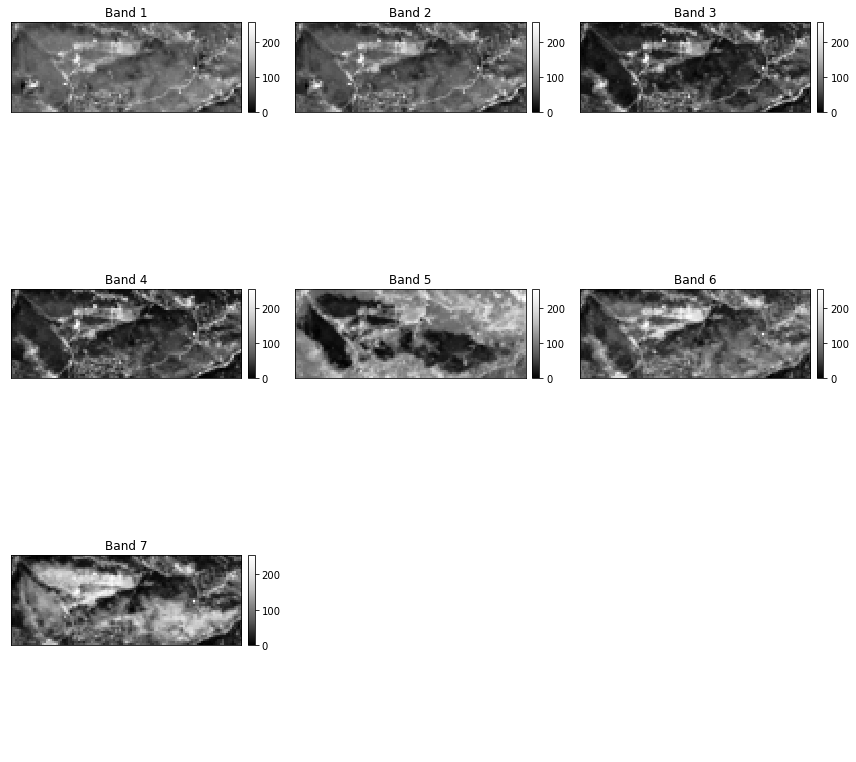

In [14]:
# Plot the data as a visual check
ep.plot_bands(landsat_data["20160723"])
plt.show()

At this point you have a working loop that processes, crops, and stacks your 
data. You can at any time add additional cleaning steps to existing functions 
or you could create new functions and add those to the workflow. 

Next, you may want to calculate your vegetation indices using functions or steps.
Below two additional objects are created for ndvi and nbr respectively. Note that 
you could combine these into one dict or keep them separate depending upon 
your workflow! Or maybe you decided that you do'nt need the dict of cleaned 
data. you ONLY want the dict for NDVI and NBR

In [15]:
# Nested dictionary can be used to store information hierarchically as an option

veg_indices = {}

veg_indices["date"] = {"ndvi": .8, "nbr": .8}
                       
veg_indices["date"]["ndvi"] 

0.8

Below you create a nested dictionary to store information. You can then use this to calculate
your difference raster which you need for the final plots in this assignment.

In [16]:
# First create the high level loop to loop through 1) each landsat directory and then 2) the files
landsat_data = {}
veg_index = {}

for landsat_dir in all_dirs:
    all_files = []
    # print(landsat_dir)
    # Get all tif files in the directory
    all_files = sorted(glob(os.path.join(landsat_dir, "*.tif")))
    crop_path = os.path.join(landsat_dir, "cropped")

    # crop & stack data
    landsat_arr, landsat_meta = crop_stack_data(files_to_crop=all_files,
                                                crop_path=crop_path,
                                                crop_bound=fire_boundary)

    # Mask data
    pixel_qa_path = glob(crop_path + "/*pixel_qa*.tif")

    # Get dir name - you could also chose to just use the date as the scene dictionary key
    
    landsat_scene = os.path.basename(os.path.normpath(landsat_dir))
    scene_date = landsat_scene[10:18]

    cleaned_landsat = mask_data(landsat_arr, pixel_qa_path)
    
    # Calculate NDVI - note that the way this is written, it will only work for 
    # landsat / ndvi as the band numbers are hard coded.
    # Also note that the bands below are not necessarily correct.
    veg_index[scene_date] = {"ndvi": es.normalized_diff(cleaned_landsat[4], cleaned_landsat[3]),
                       "nbr": (cleaned_landsat[4], cleaned_landsat[3])} 
    
    # Calculate difference


veg_index

There are no pixels to mask
There are no pixels to mask


{'20160621': {'ndvi': array([[0.5682955 , 0.53015605, 0.54238506, ..., 0.72693224, 0.65199839,
          0.55299539],
         [0.6602831 , 0.54867257, 0.38438438, ..., 0.63972736, 0.61467236,
          0.57752341],
         [0.63986014, 0.53495217, 0.35419735, ..., 0.56337136, 0.62398013,
          0.62295652],
         ...,
         [0.49162479, 0.46567281, 0.55887097, ..., 0.57371795, 0.58142018,
          0.52371027],
         [0.47592671, 0.50224398, 0.57437071, ..., 0.5620438 , 0.52084433,
          0.48544153],
         [0.49414317, 0.49425287, 0.54862237, ..., 0.53507424, 0.49279539,
          0.48444032]]),
  'nbr': (array([[2038, 1814, 2147, ..., 2536, 2046, 2022],
          [1994, 1925, 1844, ..., 2526, 2267, 2274],
          [2345, 2086, 1839, ..., 2467, 2289, 2333],
          ...,
          [1781, 1868, 1933, ..., 1473, 1481, 1462],
          [1732, 1841, 2064, ..., 1498, 1441, 1556],
          [1722, 1755, 1911, ..., 1499, 1554, 1598]], dtype=int16),
   array([[561, 557, 

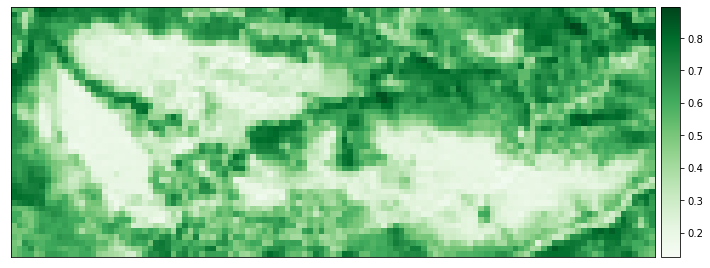

In [17]:
ep.plot_bands(veg_index["20160723"]["ndvi"],
             scale=False, cmap = "Greens")
plt.show()